In [139]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [140]:
import plotly.graph_objects as go
import plotly.express as px

In [141]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [142]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

### ƒCO2 against DIC - Baseline

In [143]:
dic_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [144]:
fco2_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_baseline_2.6_cropped.nc')

In [145]:
alk_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [146]:
co2flux_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_Baseline_2.6_cropped.nc')

In [147]:
ph_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/pH/ph_baseline_2.6_cropped.nc')

In [148]:
dic_baseline = dic_baseline.where((3 < dic_baseline.nav_lon) & (dic_baseline.nav_lon < 4) & (52 < dic_baseline.nav_lat) & (dic_baseline.nav_lat < 53), drop=True)

In [149]:
fco2_baseline = fco2_baseline.where((3 < fco2_baseline.nav_lon) & (fco2_baseline.nav_lon < 4) & (52 < fco2_baseline.nav_lat) & (fco2_baseline.nav_lat < 53), drop=True)

In [150]:
co2flux_baseline = co2flux_baseline.where((3 < co2flux_baseline.nav_lon) & (co2flux_baseline.nav_lon < 4) & (52 < co2flux_baseline.nav_lat) & (co2flux_baseline.nav_lat < 53), drop=True)

In [151]:
ph_baseline = ph_baseline.where((3 < ph_baseline.nav_lon) & (ph_baseline.nav_lon < 4) & (52 < ph_baseline.nav_lat) & (ph_baseline.nav_lat < 53), drop=True)

In [152]:
alk_baseline = alk_baseline.where((3 < alk_baseline.nav_lon) & (alk_baseline.nav_lon < 4) & (52 < alk_baseline.nav_lat) & (alk_baseline.nav_lat < 53), drop=True)

In [153]:
dic_baseline = dic_baseline.where(dic_baseline)

In [154]:
fco2_baseline = fco2_baseline.fco2[0,:]
fco2_baseline = fco2_baseline.to_dataset(name='fco2')

In [155]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_baseline = fco2_baseline.sel(time_counter=slice(start_date, end_date))
fco2_frame_baseline = fco2_frame_baseline.fco2.mean(dim=('y', 'x'))

In [156]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_baseline = dic_baseline.sel(time_counter=slice(start_date, end_date))
dic_frame_baseline = dic_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))

In [157]:
fco2_frame_baseline = fco2_frame_baseline.to_dataframe('fco2')
dic_frame_baseline = dic_frame_baseline.to_dataframe('DIC')

In [158]:
mean_dic_baseline = dic_frame_baseline.groupby(dic_frame_baseline.index.month).DIC.mean()
mean_dic_baseline = mean_dic_baseline.reset_index()
mean_dic_baseline['time_counter'] = mean_dic_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_baseline = mean_dic_baseline.set_index('time_counter')

In [159]:
mean_fco2_baseline = fco2_frame_baseline.groupby(fco2_frame_baseline.index.month).fco2.mean()
mean_fco2_baseline = mean_fco2_baseline.reset_index()
mean_fco2_baseline['time_counter']= mean_fco2_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_baseline = mean_fco2_baseline.set_index('time_counter')

In [160]:
alk_baseline = alk_baseline.where(alk_baseline)

In [161]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_baseline = alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [162]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')

In [163]:
mean_alk_baseline = alk_frame_baseline.groupby(alk_frame_baseline.index.month).ALK.mean()
mean_alk_baseline = mean_alk_baseline.reset_index()
mean_alk_baseline['time_counter']= mean_alk_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_baseline = mean_alk_baseline.set_index('time_counter')

In [164]:
co2flux_baseline = co2flux_baseline.co2flux * 31536000
co2flux_baseline = co2flux_baseline / 0.04401 # mol/m2/yr CO2

In [165]:
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [166]:
co2flux_baseline = co2flux_baseline.co2flux[0,:]
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [167]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux.mean(dim=('y', 'x'))

In [168]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux')

In [169]:
mean_co2flux_baseline = co2flux_frame_baseline.groupby(co2flux_frame_baseline.index.month).co2flux.mean()
mean_co2flux_baseline = mean_co2flux_baseline.reset_index()
mean_co2flux_baseline['time_counter']= mean_co2flux_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_baseline = mean_co2flux_baseline.set_index('time_counter')

In [170]:
ph_baseline = ph_baseline.ph[0,:]
ph_baseline = ph_baseline.to_dataset(name='ph')

In [171]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_baseline = ph_baseline.sel(time_counter=slice(start_date, end_date))
ph_frame_baseline = ph_frame_baseline.ph.mean(dim=('y', 'x'))

In [172]:
ph_frame_baseline = ph_frame_baseline.to_dataframe('ph')

In [173]:
mean_ph_baseline = ph_frame_baseline.groupby(ph_frame_baseline.index.month).ph.mean()
mean_ph_baseline = mean_ph_baseline.reset_index()
mean_ph_baseline['time_counter'] = mean_ph_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_baseline = mean_ph_baseline.set_index('time_counter')

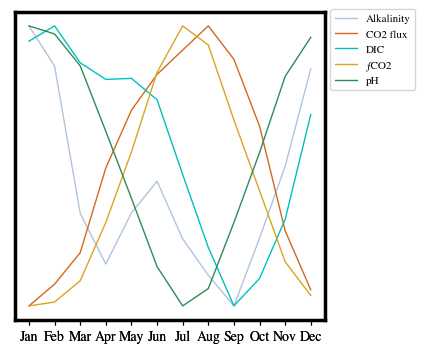

In [174]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1", frame_on=True)
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
ax4 = fig.add_subplot(111, label="4", frame_on=False)
ax5 = fig.add_subplot(111, label="5", frame_on=False)

ax.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=1, color="lightsteelblue", label = 'Alkalinity')
ax.set_xticks([], [])

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=1, color="chocolate", label = 'CO2 flux')
ax2.set_xticks([], [])

ax3.plot(mean_dic_baseline.index, mean_dic_baseline.DIC, linewidth=1, color="c", label = 'DIC')
ax3.set_xticks([], [])

ax4.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=1, color="goldenrod", label = 'ƒCO2')
ax4.tick_params(axis='both', which='major', labelsize=10)

ax5.plot(mean_ph_baseline.index, mean_ph_baseline.ph, linewidth=1, color="seagreen", label = 'pH')
ax5.tick_params(axis='both', which='major', labelsize=10)

axl = [ax, ax2, ax3, ax4, ax5]

for x in axl:
    x.set_yticks([], [])

fig.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=8)

pass

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/variable_comparison_baseline_datapoint.png')

In [175]:
co2flux_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_OAE_2.6_cropped.nc')

In [176]:
ph_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/pH/ph_OAE_2.6_cropped.nc')

In [177]:
alk_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [178]:
dic_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [179]:
fco2_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_OAE_2.6_cropped.nc')

In [180]:
dic_oae = dic_oae.where((3 < dic_oae.nav_lon) & (dic_oae.nav_lon < 4) & (52 < dic_oae.nav_lat) & (dic_oae.nav_lat < 53), drop=True)

In [181]:
fco2_oae = fco2_oae.where((3 < fco2_oae.nav_lon) & (fco2_oae.nav_lon < 4) & (52 < fco2_oae.nav_lat) & (fco2_oae.nav_lat < 53), drop=True)

In [182]:
co2flux_oae = co2flux_oae.where((3 < co2flux_oae.nav_lon) & (co2flux_oae.nav_lon < 4) & (52 < co2flux_oae.nav_lat) & (co2flux_oae.nav_lat < 53), drop=True)

In [183]:
ph_oae = ph_oae.where((3 < ph_oae.nav_lon) & (ph_oae.nav_lon < 4) & (52 < ph_oae.nav_lat) & (ph_oae.nav_lat < 53), drop=True)

In [184]:
alk_oae = alk_oae.where((3 < alk_oae.nav_lon) & (alk_oae.nav_lon < 4) & (52 < alk_oae.nav_lat) & (alk_oae.nav_lat < 53), drop=True)

In [185]:
dic_oae = dic_oae.where(dic_oae)

In [186]:
fco2_oae = fco2_oae.fco2[0,:]
fco2_oae = fco2_oae.to_dataset(name='fco2')

In [187]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_oae = fco2_oae.sel(time_counter=slice(start_date, end_date))
fco2_frame_oae = fco2_frame_oae.fco2.mean(dim=('y', 'x'))

In [188]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_oae = dic_oae.sel(time_counter=slice(start_date, end_date))
dic_frame_oae = dic_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [189]:
fco2_frame_oae = fco2_frame_oae.to_dataframe('fco2')
dic_frame_oae = dic_frame_oae.to_dataframe('DIC')

In [190]:
mean_dic_oae = dic_frame_oae.groupby(dic_frame_oae.index.month).DIC.mean()
mean_dic_oae = mean_dic_oae.reset_index()
mean_dic_oae['time_counter'] = mean_dic_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_oae = mean_dic_oae.set_index('time_counter')

In [191]:
mean_fco2_oae = fco2_frame_oae.groupby(fco2_frame_oae.index.month).fco2.mean()
mean_fco2_oae = mean_fco2_oae.reset_index()
mean_fco2_oae['time_counter']= mean_fco2_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_oae = mean_fco2_oae.set_index('time_counter')

In [192]:
alk_oae = alk_oae.where(alk_oae)

In [193]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_oae = alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [194]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')

In [195]:
mean_alk_oae = alk_frame_oae.groupby(alk_frame_oae.index.month).ALK.mean()
mean_alk_oae = mean_alk_oae.reset_index()
mean_alk_oae['time_counter']= mean_alk_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_oae = mean_alk_oae.set_index('time_counter')

In [196]:
co2flux_oae = co2flux_oae.co2flux * 31536000
co2flux_oae = co2flux_oae / 0.04401 # mol/m2/yr CO2

In [197]:
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [198]:
co2flux_oae = co2flux_oae.co2flux[0,:]
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [199]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux.mean(dim=('y', 'x'))

In [200]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux')

In [201]:
mean_co2flux_oae = co2flux_frame_oae.groupby(co2flux_frame_oae.index.month).co2flux.mean()
mean_co2flux_oae = mean_co2flux_oae.reset_index()
mean_co2flux_oae['time_counter']= mean_co2flux_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_oae = mean_co2flux_oae.set_index('time_counter')

In [202]:
ph_oae = ph_oae.ph[0,:]
ph_oae = ph_oae.to_dataset(name='ph')

In [203]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_oae = ph_oae.sel(time_counter=slice(start_date, end_date))
ph_frame_oae = ph_frame_oae.ph.mean(dim=('y', 'x'))

In [204]:
ph_frame_oae = ph_frame_oae.to_dataframe('ph')

In [205]:
mean_ph_oae = ph_frame_oae.groupby(ph_frame_oae.index.month).ph.mean()
mean_ph_oae = mean_ph_oae.reset_index()
mean_ph_oae['time_counter'] = mean_ph_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_oae = mean_ph_oae.set_index('time_counter')

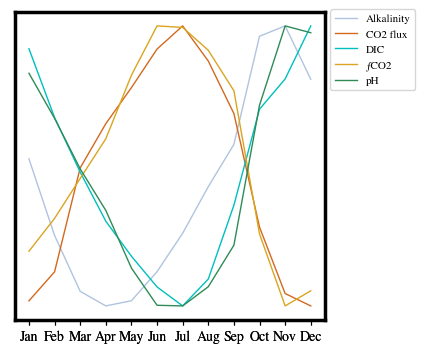

In [206]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1", frame_on=True)
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
ax4 = fig.add_subplot(111, label="4", frame_on=False)
ax5 = fig.add_subplot(111, label="5", frame_on=False)

ax.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=1, color="lightsteelblue", label = 'Alkalinity')
ax.set_xticks([], [])

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=1, color="chocolate", label = 'CO2 flux')
ax2.set_xticks([], [])

ax3.plot(mean_dic_oae.index, mean_dic_oae.DIC, linewidth=1, color="c", label = 'DIC')
ax3.set_xticks([], [])

ax4.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=1, color="goldenrod", label = 'ƒCO2')
ax4.tick_params(axis='both', which='major', labelsize=10)

ax5.plot(mean_ph_oae.index, mean_ph_oae.ph, linewidth=1, color="seagreen", label = 'pH')
ax5.tick_params(axis='both', which='major', labelsize=10)

axl = [ax, ax2, ax3, ax4, ax5]

for x in axl:
    x.set_yticks([], [])

fig.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=8)

pass

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/variable_comparison_oae_datapoint.png')